In [163]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings( "ignore" )

In [164]:
df=pd.read_csv("bank-full.csv", sep=';')


In [165]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [166]:
df.shape

(45211, 17)

In [167]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [168]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [170]:
le = LabelEncoder()

In [171]:
label = le.fit_transform(df['y'])
 

In [172]:
label

array([0, 0, 0, ..., 1, 0, 0])

In [173]:
df.drop('y', axis=1, inplace=True)
df['y'] = label
 
 

In [174]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [175]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [176]:
label = le.fit_transform(df['job'])
label
 

array([4, 9, 2, ..., 5, 1, 2])

In [177]:
df.drop('job', axis=1, inplace=True)
df['job'] = label

In [178]:
df

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,4
1,44,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,9
2,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,2
3,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,1
4,33,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,9
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,5
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,5
45209,57,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,1


In [179]:
label = le.fit_transform(df['marital'])
label
 

array([1, 2, 1, ..., 1, 1, 1])

In [180]:
df.drop('marital', axis=1, inplace=True)
df['marital'] = label

In [181]:
df

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job,marital
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,4,1
1,44,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,9,2
2,33,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,2,1
3,47,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,1,1
4,33,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,9,1
45207,71,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,5,0
45208,72,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,5,1
45209,57,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,1,1


In [182]:
label = le.fit_transform(df['education'])
label
df.drop('education', axis=1, inplace=True)
df['education'] = label
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job,marital,education
0,58,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,4,1,2
1,44,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,9,2,1
2,33,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,2,1,1
3,47,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,1,1,3
4,33,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,11,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,9,1,2
45207,71,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,5,0,0
45208,72,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,5,1,1
45209,57,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,1,1,1


In [183]:
label = le.fit_transform(df['default'])
label
df.drop('default', axis=1, inplace=True)
df['default'] = label
df

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job,marital,education,default
0,58,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,4,1,2,0
1,44,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,9,2,1,0
2,33,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,2,1,1,0
3,47,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,1,1,3,0
4,33,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,11,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,9,1,2,0
45207,71,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,5,0,0,0
45208,72,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,5,1,1,0
45209,57,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,1,1,1,0


In [184]:
label = le.fit_transform(df['housing'])
label
df.drop('housing', axis=1, inplace=True)
df['housing'] = label
df

,age,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job,marital,education,default,housing
0,58,2143,no,unknown,5,may,261,1,-1,0,unknown,0,4,1,2,0,1
1,44,29,no,unknown,5,may,151,1,-1,0,unknown,0,9,2,1,0,1
2,33,2,yes,unknown,5,may,76,1,-1,0,unknown,0,2,1,1,0,1
3,47,1506,no,unknown,5,may,92,1,-1,0,unknown,0,1,1,3,0,1
4,33,1,no,unknown,5,may,198,1,-1,0,unknown,0,11,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,cellular,17,nov,977,3,-1,0,unknown,1,9,1,2,0,0
45207,71,1729,no,cellular,17,nov,456,2,-1,0,unknown,1,5,0,0,0,0
45208,72,5715,no,cellular,17,nov,1127,5,184,3,success,1,5,1,1,0,0
45209,57,668,no,telephone,17,nov,508,4,-1,0,unknown,0,1,1,1,0,0


In [185]:
label = le.fit_transform(df['loan'])
label
df.drop('loan', axis=1, inplace=True)
df['loan'] = label
df

,age,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job,marital,education,default,housing,loan
0,58,2143,unknown,5,may,261,1,-1,0,unknown,0,4,1,2,0,1,0
1,44,29,unknown,5,may,151,1,-1,0,unknown,0,9,2,1,0,1,0
2,33,2,unknown,5,may,76,1,-1,0,unknown,0,2,1,1,0,1,1
3,47,1506,unknown,5,may,92,1,-1,0,unknown,0,1,1,3,0,1,0
4,33,1,unknown,5,may,198,1,-1,0,unknown,0,11,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,cellular,17,nov,977,3,-1,0,unknown,1,9,1,2,0,0,0
45207,71,1729,cellular,17,nov,456,2,-1,0,unknown,1,5,0,0,0,0,0
45208,72,5715,cellular,17,nov,1127,5,184,3,success,1,5,1,1,0,0,0
45209,57,668,telephone,17,nov,508,4,-1,0,unknown,0,1,1,1,0,0,0


In [186]:
label = le.fit_transform(df['contact'])
label
df.drop('contact', axis=1, inplace=True)
df['contact'] = label
df

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,y,job,marital,education,default,housing,loan,contact
0,58,2143,5,may,261,1,-1,0,unknown,0,4,1,2,0,1,0,2
1,44,29,5,may,151,1,-1,0,unknown,0,9,2,1,0,1,0,2
2,33,2,5,may,76,1,-1,0,unknown,0,2,1,1,0,1,1,2
3,47,1506,5,may,92,1,-1,0,unknown,0,1,1,3,0,1,0,2
4,33,1,5,may,198,1,-1,0,unknown,0,11,2,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,unknown,1,9,1,2,0,0,0,0
45207,71,1729,17,nov,456,2,-1,0,unknown,1,5,0,0,0,0,0,0
45208,72,5715,17,nov,1127,5,184,3,success,1,5,1,1,0,0,0,0
45209,57,668,17,nov,508,4,-1,0,unknown,0,1,1,1,0,0,0,1


In [187]:
label = le.fit_transform(df['month'])
label
df.drop('month', axis=1, inplace=True)
df['month'] = label
df

,age,balance,day,duration,campaign,pdays,previous,poutcome,y,job,marital,education,default,housing,loan,contact,month
0,58,2143,5,261,1,-1,0,unknown,0,4,1,2,0,1,0,2,8
1,44,29,5,151,1,-1,0,unknown,0,9,2,1,0,1,0,2,8
2,33,2,5,76,1,-1,0,unknown,0,2,1,1,0,1,1,2,8
3,47,1506,5,92,1,-1,0,unknown,0,1,1,3,0,1,0,2,8
4,33,1,5,198,1,-1,0,unknown,0,11,2,3,0,0,0,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,unknown,1,9,1,2,0,0,0,0,9
45207,71,1729,17,456,2,-1,0,unknown,1,5,0,0,0,0,0,0,9
45208,72,5715,17,1127,5,184,3,success,1,5,1,1,0,0,0,0,9
45209,57,668,17,508,4,-1,0,unknown,0,1,1,1,0,0,0,1,9


In [188]:
label = le.fit_transform(df['poutcome'])
label
df.drop('poutcome', axis=1, inplace=True)
df['poutcome'] = label
df

,age,balance,day,duration,campaign,pdays,previous,y,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,0,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,9,1,2,0,0,0,0,9,3
45207,71,1729,17,456,2,-1,0,1,5,0,0,0,0,0,0,9,3
45208,72,5715,17,1127,5,184,3,1,5,1,1,0,0,0,0,9,2
45209,57,668,17,508,4,-1,0,0,1,1,1,0,0,0,1,9,3


In [189]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'],
      dtype='object')

In [190]:
columns_titles = ['y', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome']
df=df.reindex(columns=columns_titles)

In [191]:
df

,y,balance,day,duration,campaign,pdays,previous,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,0,2143,5,261,1,-1,0,58,4,1,2,0,1,0,2,8,3
1,0,29,5,151,1,-1,0,44,9,2,1,0,1,0,2,8,3
2,0,2,5,76,1,-1,0,33,2,1,1,0,1,1,2,8,3
3,0,1506,5,92,1,-1,0,47,1,1,3,0,1,0,2,8,3
4,0,1,5,198,1,-1,0,33,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,825,17,977,3,-1,0,51,9,1,2,0,0,0,0,9,3
45207,1,1729,17,456,2,-1,0,71,5,0,0,0,0,0,0,9,3
45208,1,5715,17,1127,5,184,3,72,5,1,1,0,0,0,0,9,2
45209,0,668,17,508,4,-1,0,57,1,1,1,0,0,0,1,9,3


In [193]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [194]:
X

,balance,day,duration,campaign,pdays,previous,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,2143,5,261,1,-1,0,58,4,1,2,0,1,0,2,8,3
1,29,5,151,1,-1,0,44,9,2,1,0,1,0,2,8,3
2,2,5,76,1,-1,0,33,2,1,1,0,1,1,2,8,3
3,1506,5,92,1,-1,0,47,1,1,3,0,1,0,2,8,3
4,1,5,198,1,-1,0,33,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,-1,0,51,9,1,2,0,0,0,0,9,3
45207,1729,17,456,2,-1,0,71,5,0,0,0,0,0,0,9,3
45208,5715,17,1127,5,184,3,72,5,1,1,0,0,0,0,9,2
45209,668,17,508,4,-1,0,57,1,1,1,0,0,0,1,9,3


In [195]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [196]:
 X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )

In [197]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [198]:
Y_pred = classifier.predict(X_test)

In [199]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [200]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(Y_test, Y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[13011   284]
 [ 1452   324]]


In [201]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))

Accuracy :  0.8848118903855086


Text(0, 0.5, 'True Positive Rate')

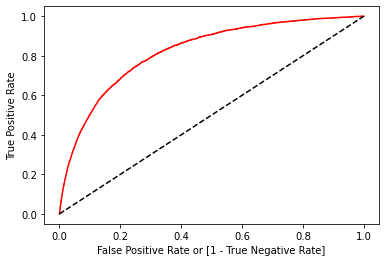

In [202]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y_test, Y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit mod  el ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')